# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---



## 1.
Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$



### 🧮 Paso 1: Plantear las ecuaciones de movimiento

Dado que ambos comienzan en $x_i = 0$, las ecuaciones son:

- **Para la moto** (Movimiento rectilíneo uniforme):

  $$x_m(t) = v_m \cdot t$$

- **Para el policía** (Movimiento rectilíneo uniformemente acelerado desde el reposo):
  
  $$x_p(t) = \frac{1}{2} a_p \cdot t^2$$

Queremos encontrar el tiempo $t$ en el que ambos se encuentran, es decir, cuando:

$$x_m(t) = x_p(t)$$

Sustituyendo:

$$v_m \cdot t = \frac{1}{2} a_p \cdot t^2$$

Despejando $t$ (y asumiendo $t \ne 0$):


$$t = \frac{2 v_m}{a_p}$$

---

#### ✅ Prueba con valores:
**Pruebe**:
- Si $v_m$ = 15 m/s y $a_p$ = 3 m/s², entonces:
$t = \frac{2 \cdot 15}{3}$ = 10s

¡Coincide con el resultado esperado!

Ingrese la velocidad de la moto (m/s): 15
Ingrese la aceleración del policía (m/s²): 3


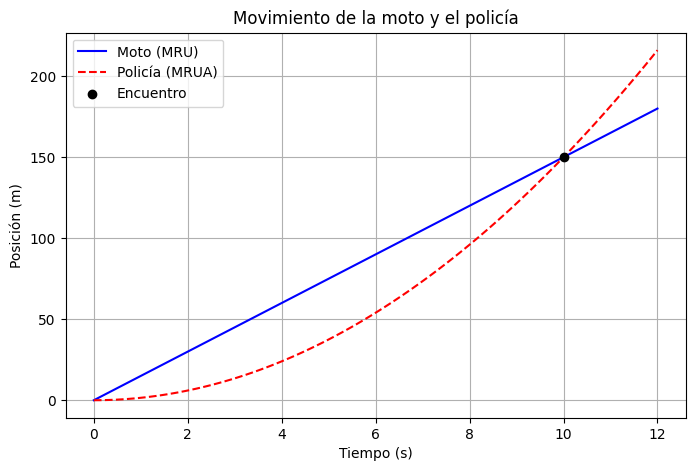


El policía alcanza a la moto en t = 10.00 segundos.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Solicitar valores al usuario
v_m = float(input("Ingrese la velocidad de la moto (m/s): "))
a_p = float(input("Ingrese la aceleración del policía (m/s²): "))

# Calcular el tiempo de encuentro
t_encuentro = (2 * v_m) / a_p

# Crear un rango de tiempo hasta un poco después del encuentro
t = np.linspace(0, t_encuentro + 2, 100)

# Posiciones en función del tiempo
x_moto = v_m * t
x_policia = 0.5 * a_p * t**2

# Graficar los movimientos
plt.figure(figsize=(8, 5))
plt.plot(t, x_moto, label="Moto (MRU)", color="blue")
plt.plot(t, x_policia, label="Policía (MRUA)", color="red", linestyle="--")

# Marcar el punto de encuentro
plt.scatter([t_encuentro], [v_m * t_encuentro], color="black", zorder=3, label="Encuentro")

# Configuración de la gráfica
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.title("Movimiento de la moto y el policía")
plt.legend()
plt.grid()
plt.show()

# Imprimir el tiempo de encuentro
print(f"\nEl policía alcanza a la moto en t = {t_encuentro:.2f} segundos.")

---

##2.
El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/16}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/16}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.




### 🧪 a. Función para modelar el potencial Lennard-Jones


In [2]:
def lennard_jones(r, sigma, epsilon):
    """
    Calcula el potencial de Lennard-Jones para una distancia r,
    con parámetros sigma y epsilon.
    """
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

###📉 b. Gráfico del potencial con σ = ε = 1

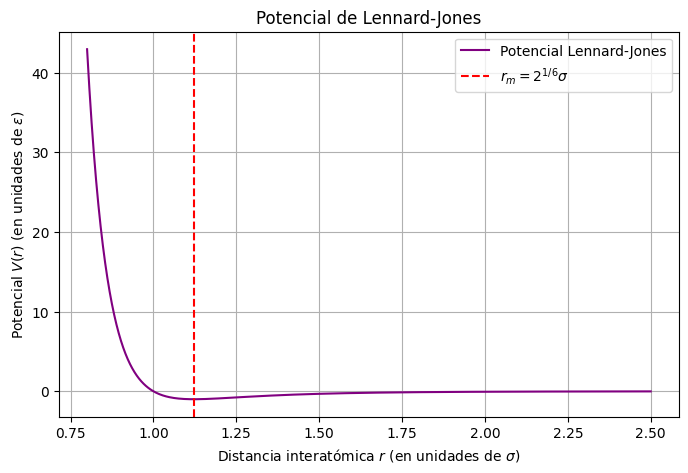

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
sigma = 1
epsilon = 1
r_c = 2.5 * sigma

# Distancia interatómica (evitando r = 0)
r = np.linspace(0.8 * sigma, r_c, 500)

# Potencial LJ
V = lennard_jones(r, sigma, epsilon)

# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(r, V, label="Potencial Lennard-Jones", color="purple")

# Marcar mínimo teórico
r_min = 2**(1/6) * sigma
plt.axvline(x=r_min, color="red", linestyle="--", label=r"$r_m = 2^{1/6} \sigma$")

# Etiquetas y estilo
plt.title("Potencial de Lennard-Jones")
plt.xlabel("Distancia interatómica $r$ (en unidades de $\sigma$)")
plt.ylabel("Potencial $V(r)$ (en unidades de $\epsilon$)")
plt.grid(True)
plt.legend()
plt.show()

###🧪 c. Verificación para diferentes valores de σ

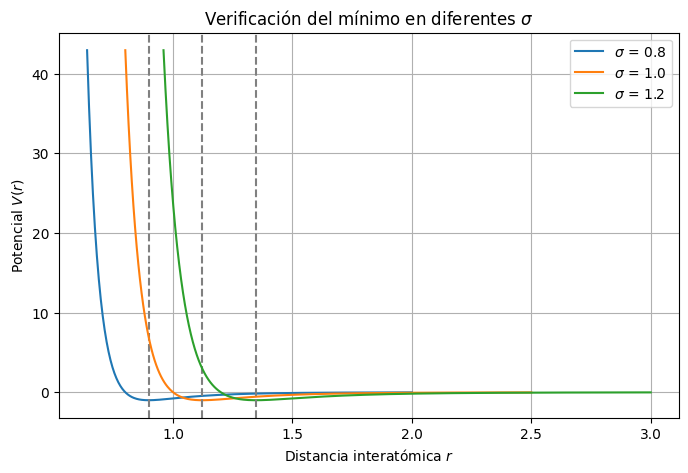

In [4]:
sigmas = [0.8, 1.0, 1.2]
epsilon = 1
r_m_teorico = [2**(1/6) * s for s in sigmas]

plt.figure(figsize=(8, 5))

for i, sigma in enumerate(sigmas):
    r = np.linspace(0.8 * sigma, 2.5 * sigma, 500)
    V = lennard_jones(r, sigma, epsilon)
    plt.plot(r, V, label=f"$\sigma$ = {sigma}")
    plt.axvline(2**(1/6) * sigma, color='gray', linestyle='--')

plt.title("Verificación del mínimo en diferentes $\sigma$")
plt.xlabel("Distancia interatómica $r$")
plt.ylabel("Potencial $V(r)$")
plt.grid(True)
plt.legend()
plt.show()

##3.  
El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 5, 10, 15 y 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres de las columnas al español.

b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños y niñas en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.


In [20]:
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]

In [21]:
import pandas as pd

url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"
html_content = pd.read_html(url)

# Ver cuántas tablas hay
print(f"Número de tablas: {len(html_content)}")

# Mostrar las columnas de cada tabla
for i, table in enumerate(html_content):
    print(f"\nTabla {i}:")
    print(table.columns)

Número de tablas: 3

Tabla 0:
Index(['Unnamed: 0', 'Country', 'Average Height, Boys, 19 yo (cm)↓',
       'Girls 19 (cm)', 'Boys 19 (in)', 'Girls 19 (in)'],
      dtype='object')

Tabla 1:
Index(['Country', 'Average Height, Boys, 19 yo (cm)'], dtype='object')

Tabla 2:
Index(['Country', 'Average Height, Boys, 19 yo (cm)'], dtype='object')


###🔧 a. Limpieza del dataset alturas

In [22]:
# Extraer tabla correcta
alturas = html_content[0]

# Eliminar columnas con "(in)"
alturas = alturas.drop(columns=[col for col in alturas.columns if "(in)" in col])

# Renombrar columnas al español
alturas.columns = ["#", "País", "Niños 19 años", "Niñas 19 años"]

###📊 b. Gráfico de barras: comparación niños vs niñas

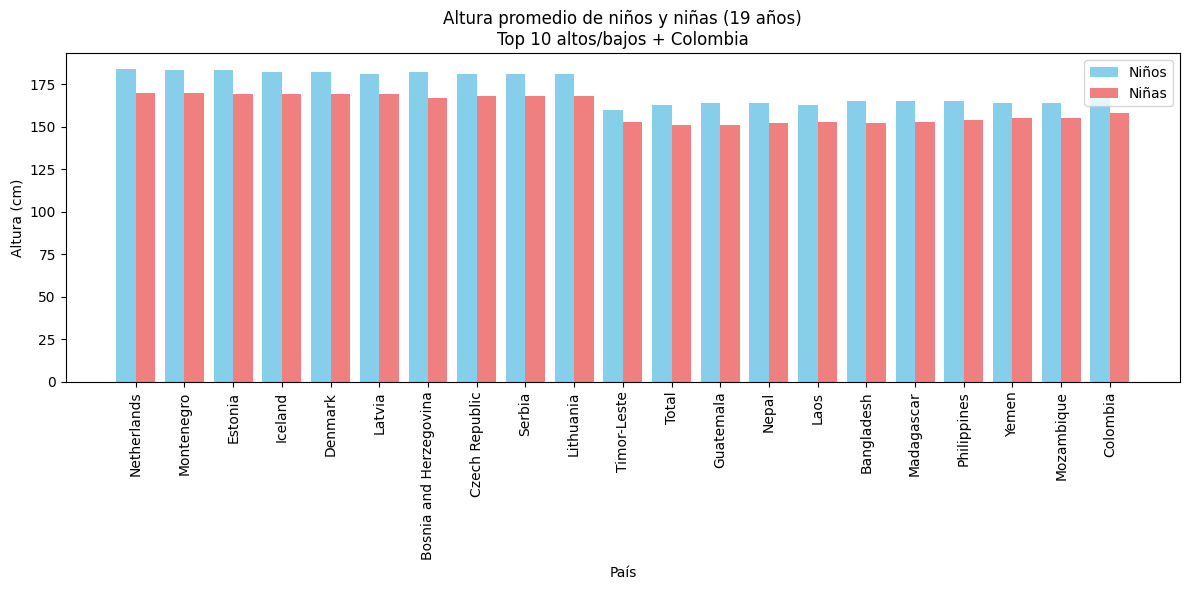

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Calcular promedio de altura
alturas["Promedio 19 años"] = (alturas["Niños 19 años"] + alturas["Niñas 19 años"]) / 2

# Top 10 más altos y más bajos
top10_altos = alturas.nlargest(10, "Promedio 19 años")
top10_bajos = alturas.nsmallest(10, "Promedio 19 años")

# Buscar Colombia (por si no está en los extremos)
colombia = alturas[alturas["País"] == "Colombia"]

# Combinar y eliminar duplicados
df_grafico = pd.concat([top10_altos, top10_bajos, colombia]).drop_duplicates(subset="País")

# Gráfico
plt.figure(figsize=(12, 6))
x = df_grafico["País"]
niños = df_grafico["Niños 19 años"]
niñas = df_grafico["Niñas 19 años"]

bar_width = 0.4
index = range(len(x))

plt.bar(index, niños, width=bar_width, label="Niños", color="skyblue")
plt.bar([i + bar_width for i in index], niñas, width=bar_width, label="Niñas", color="lightcoral")

plt.xlabel("País")
plt.ylabel("Altura (cm)")
plt.title("Altura promedio de niños y niñas (19 años)\nTop 10 altos/bajos + Colombia")
plt.xticks([i + bar_width / 2 for i in index], x, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

###💰 c. Relación entre riqueza y altura

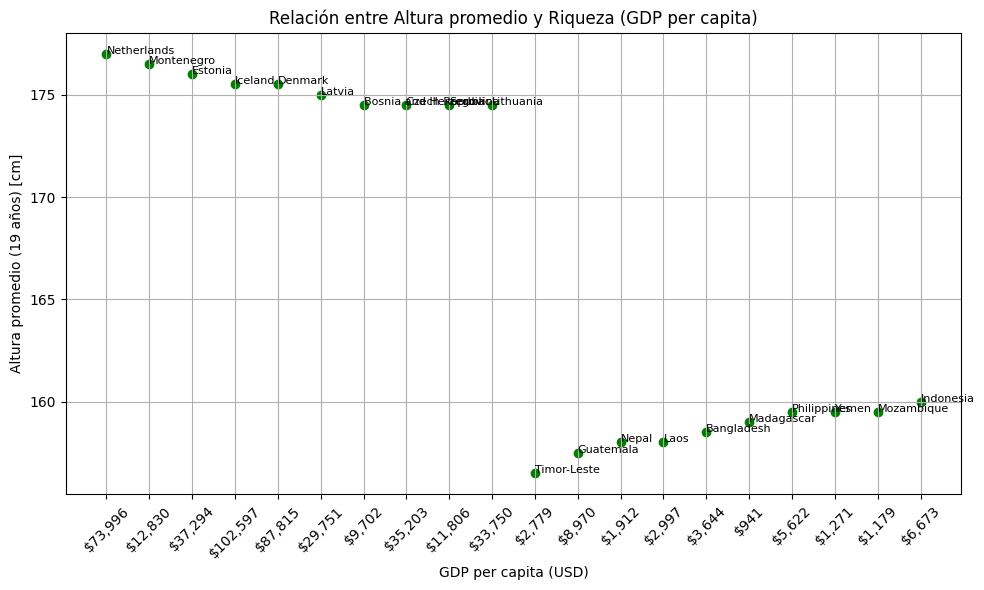

In [24]:
# Seleccionar solo las columnas necesarias
income = income[['Country', 'GDP per Adult 2022']]

# Renombrar las columnas
income.columns = ["País", "GDP per capita (USD)"]

# Ahora, realizar el merge con 'alturas'
alturas_income = pd.merge(alturas, income, on="País", how="inner")

# Calcular altura promedio
alturas_income["Altura promedio 19 años"] = (alturas_income["Niños 19 años"] + alturas_income["Niñas 19 años"]) / 2

# Top 10 más altos y más bajos
top10_altos = alturas_income.nlargest(10, "Altura promedio 19 años")
top10_bajos = alturas_income.nsmallest(10, "Altura promedio 19 años")

# Combinar
subset = pd.concat([top10_altos, top10_bajos])

# Gráfico de dispersión
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(subset["GDP per capita (USD)"], subset["Altura promedio 19 años"], color="green")

for _, row in subset.iterrows():
    plt.text(row["GDP per capita (USD)"], row["Altura promedio 19 años"], row["País"], fontsize=8)

plt.xlabel("GDP per capita (USD)")
plt.ylabel("Altura promedio (19 años) [cm]")
plt.xticks(rotation=45)
plt.title("Relación entre Altura promedio y Riqueza (GDP per capita)")
plt.grid(True)
plt.tight_layout()
plt.show()

###Conclusión sobre la Relación:
A partir del gráfico se observa una tendencia general que sugiere una posible relación entre la altura promedio de los jóvenes de 19 años y el ingreso per cápita (GDP). Los países con mayor estatura promedio —como Países Bajos, Montenegro y Estonia— tienden a tener un GDP per cápita medio o alto. Por otro lado, los países con menores estaturas —como Timor-Leste, Guatemala y Filipinas— presentan en su mayoría un GDP per cápita significativamente más bajo.

Sin embargo, la correlación no es estrictamente lineal: algunos países con estaturas altas no tienen necesariamente los GDP más altos, y viceversa. Esto sugiere que aunque la riqueza puede influir en factores como nutrición y salud (que impactan la estatura), existen también otras variables culturales, genéticas y socioeconómicas que influyen en la altura promedio de una población.